In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib
from matplotlib import pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size': 22})

## 1. 
    На ваш выбор взять выборку и тип нейронной сети. Согласовать объем выборки и сложность нейронной сети.
    
## 2. 
    В процедуру оптимизации нейронной сети вставить код, получающий ошибку на тестовой и контрольной выборках или воспользоваться встроенными процедурами.

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
def drow_acc(history) :
    plt.figure(figsize=(9,6))
    plt.grid(True)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


def drow_loss(history) :
    plt.figure(figsize=(9,6))
    plt.grid(True)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## baseline

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.2003 - acc: 0.9408 - val_loss: 0.1049 - val_acc: 0.9693
Epoch 2/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0800 - acc: 0.9750 - val_loss: 0.0788 - val_acc: 0.9761
Epoch 3/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0509 - acc: 0.9837 - val_loss: 0.0691 - val_acc: 0.9780
Epoch 4/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0377 - acc: 0.9877 - val_loss: 0.0610 - val_acc: 0.9801
Epoch 5/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0258 - acc: 0.9915 - val_loss: 0.0720 - val_acc: 0.9801
Epoch 6/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.0218 - acc: 0.9925 - val_loss: 0.0725 - val_acc: 0.9813
Epoch 7/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0167 - acc: 0.9949 - val_loss: 0.

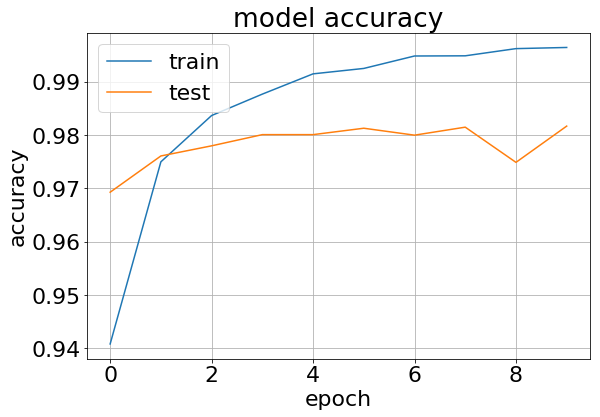

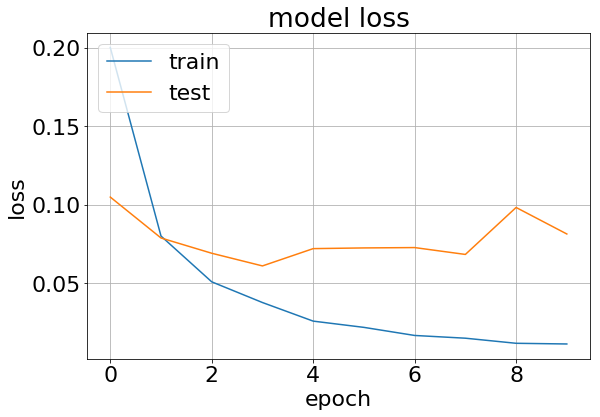

In [7]:
drow_acc(hist)
drow_loss(hist)

# 3.
    Для разных объемов выборки построить графики кривой обучения, показывающие различные скорости обучения.

Резонный вопрос. А что такое скорость обучения? В чём она меряется?

In [8]:
hist_list = []

for part in np.linspace(0.33,1,num=3) :
    print('part %s' % part)
    
    element_cnt = int(x_train.shape[0] * part)
    
    x_part_train = x_train[ :element_cnt ,:,:]
    y_part_train = y_train[ :element_cnt]
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    hist = model.fit(x_part_train, y_part_train, epochs=10, validation_data=(x_test,y_test))
    hist_list.append(hist.history)

part 0.33
Train on 19800 samples, validate on 10000 samples
Epoch 1/10
19800/19800 [==============================] - 5s 252us/step - loss: 0.3206 - acc: 0.9079 - val_loss: 0.1717 - val_acc: 0.9473
Epoch 2/10
19800/19800 [==============================] - 3s 171us/step - loss: 0.1303 - acc: 0.9617 - val_loss: 0.1375 - val_acc: 0.9574
Epoch 3/10
19800/19800 [==============================] - 3s 171us/step - loss: 0.0806 - acc: 0.9756 - val_loss: 0.1131 - val_acc: 0.9663
Epoch 4/10
19800/19800 [==============================] - 3s 174us/step - loss: 0.0501 - acc: 0.9857 - val_loss: 0.1095 - val_acc: 0.9679
Epoch 5/10
19800/19800 [==============================] - 4s 187us/step - loss: 0.0345 - acc: 0.9904 - val_loss: 0.1057 - val_acc: 0.9682
Epoch 6/10
19800/19800 [==============================] - 3s 175us/step - loss: 0.0230 - acc: 0.9937 - val_loss: 0.1197 - val_acc: 0.9644
Epoch 7/10
19800/19800 [==============================] - 4s 184us/step - loss: 0.0200 - acc: 0.9939 - val_loss:

In [48]:
hist_list[0].keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

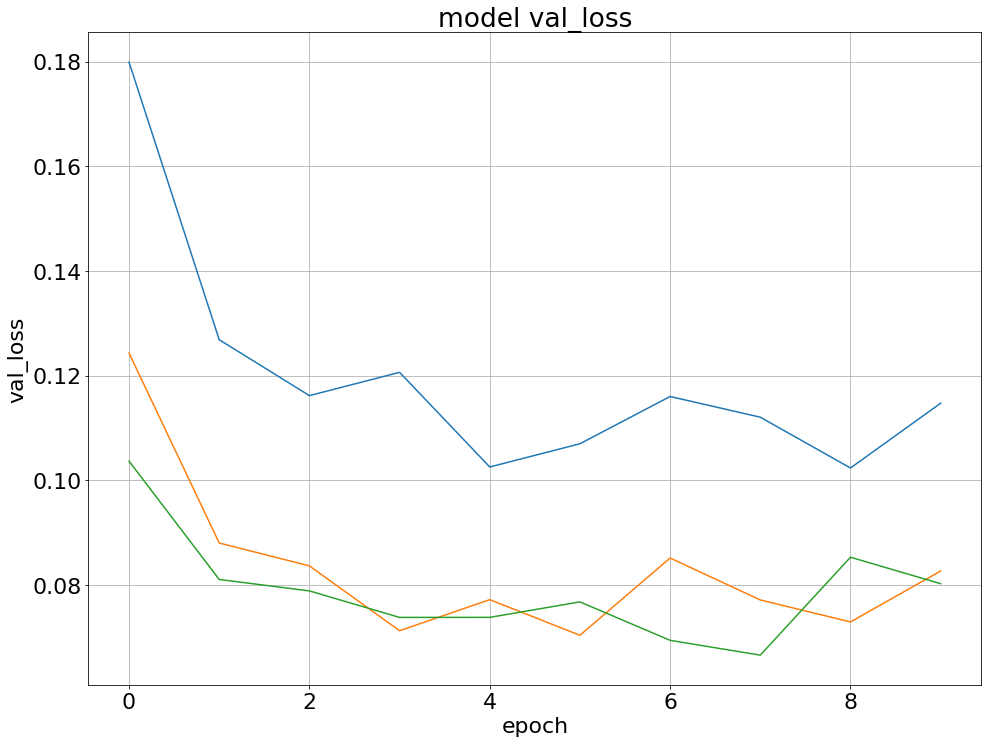

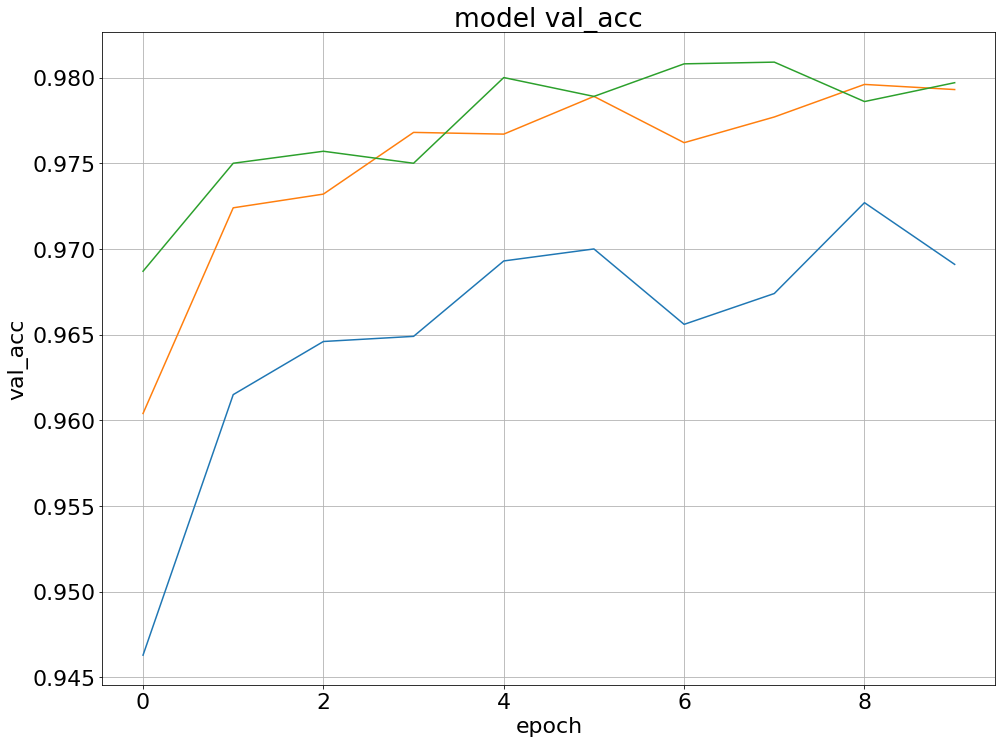

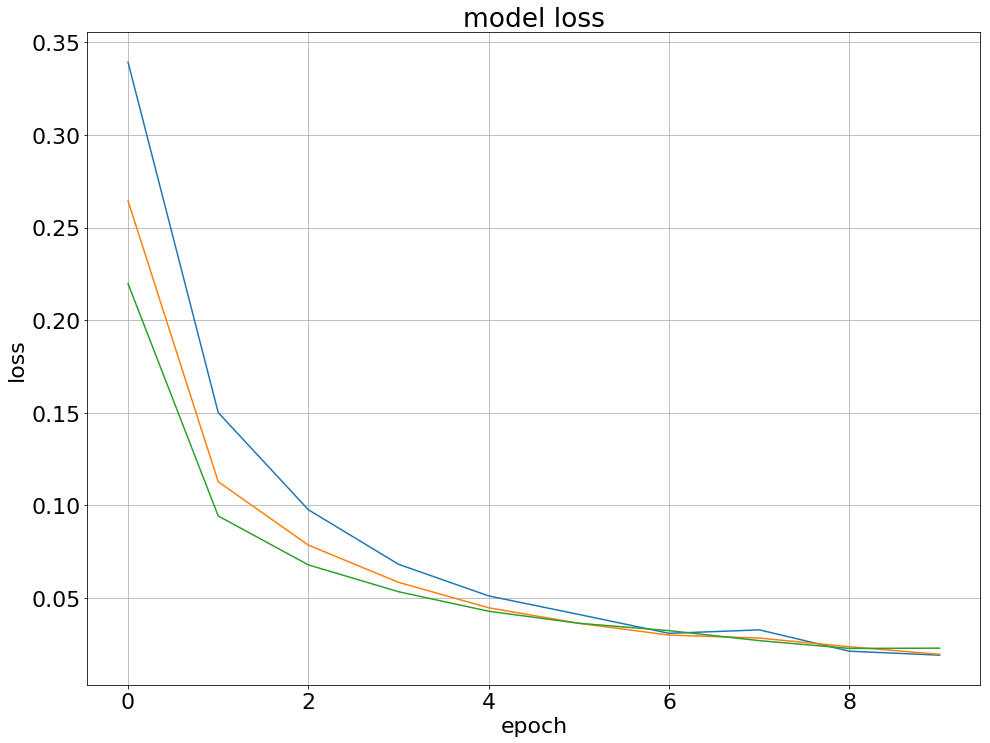

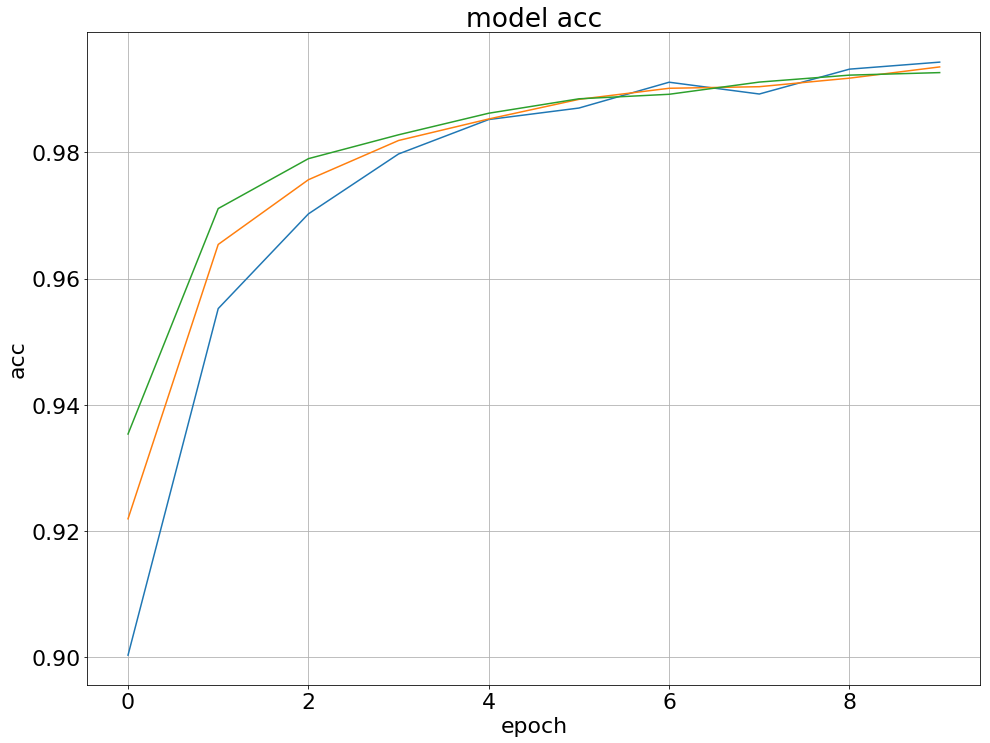

In [49]:
for key in hist_list[0].keys() :
    plt.figure(figsize=(16,12))
    plt.grid(True)

    
    plt.title('model ' + key)
    plt.ylabel(key)
    plt.xlabel('epoch')

    for hist in hist_list :
        plt.plot(hist[key])

    file_neme = 'plots/' + key + '.png'
    plt.savefig(fname=file_neme,format='png')
    plt.show()

# 4.

    Наложить на выборку шум.
    Например, перемешать независимые переменные или добавить случайный шум в зависимые, на ваш выбор. Построить несколько графиков кривой обучения в условиях наложенного шума с разной дисперсией.

Зашумлённые данне должны оставаться картинкой. (лежать в диапазоне от 0 до 1)

Пускай шум имеет нормально распределение. Тогда :
       $$mean = 0.5 $$
       $$ 3 \sigma < 0.5 $$

In [40]:
hist_list = []

for noise_koef in np.linspace(0,1,num=5) :
    
    noise = np.random.normal(loc=0.5,scale=0.16,size=x_train.shape)
    x_part_noise = x_train + noise_koef * noise
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    hist = model.fit(x_part_noise, y_train, epochs=10, validation_data=(x_test,y_test))
    hist_list.append(hist.history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.2227 - acc: 0.9338 - val_loss: 0.1046 - val_acc: 0.9682
Epoch 2/10
60000/60000 [==============================] - 26s 428us/step - loss: 0.0986 - acc: 0.9702 - val_loss: 0.0791 - val_acc: 0.9751
Epoch 3/10
60000/60000 [==============================] - 25s 424us/step - loss: 0.0701 - acc: 0.9782 - val_loss: 0.0824 - val_acc: 0.9743
Epoch 4/10
60000/60000 [==============================] - 26s 427us/step - loss: 0.0539 - acc: 0.9831 - val_loss: 0.0689 - val_acc: 0.9795
Epoch 5/10
60000/60000 [==============================] - 26s 428us/step - loss: 0.0431 - acc: 0.9861 - val_loss: 0.0666 - val_acc: 0.9807
Epoch 6/10
60000/60000 [==============================] - 26s 426us/step - loss: 0.0368 - acc: 0.9878 - val_loss: 0.0645 - val_acc: 0.9818
Epoch 7/10
60000/60000 [==============================] - 26s 432us/step - loss: 0.0306 - acc: 0.9899 - val_loss: 0.

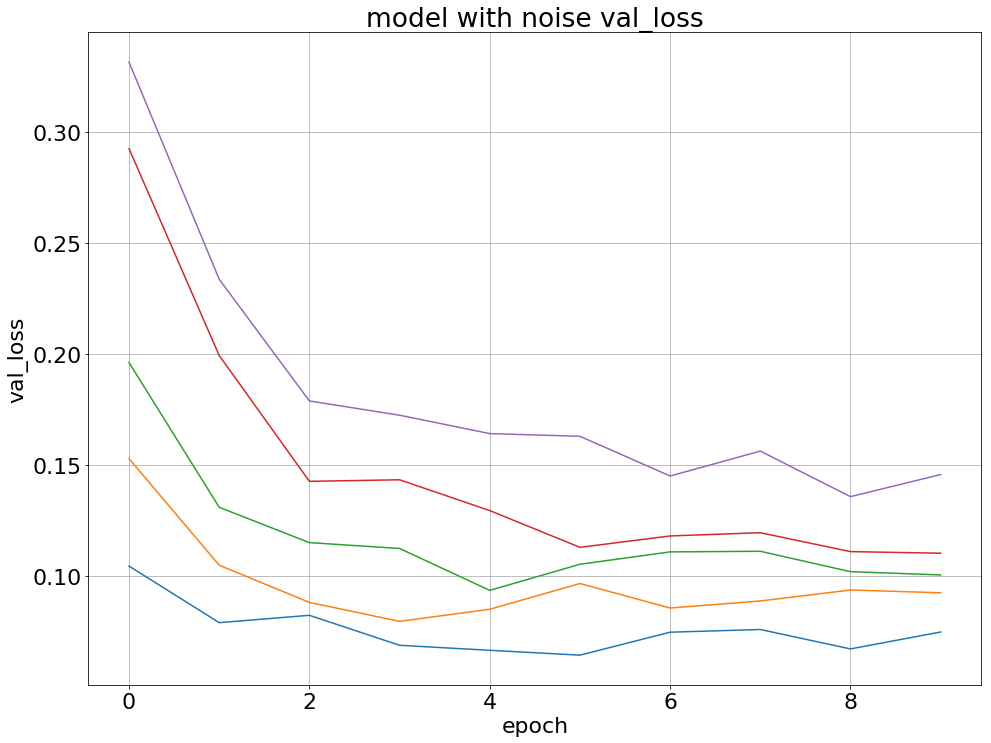

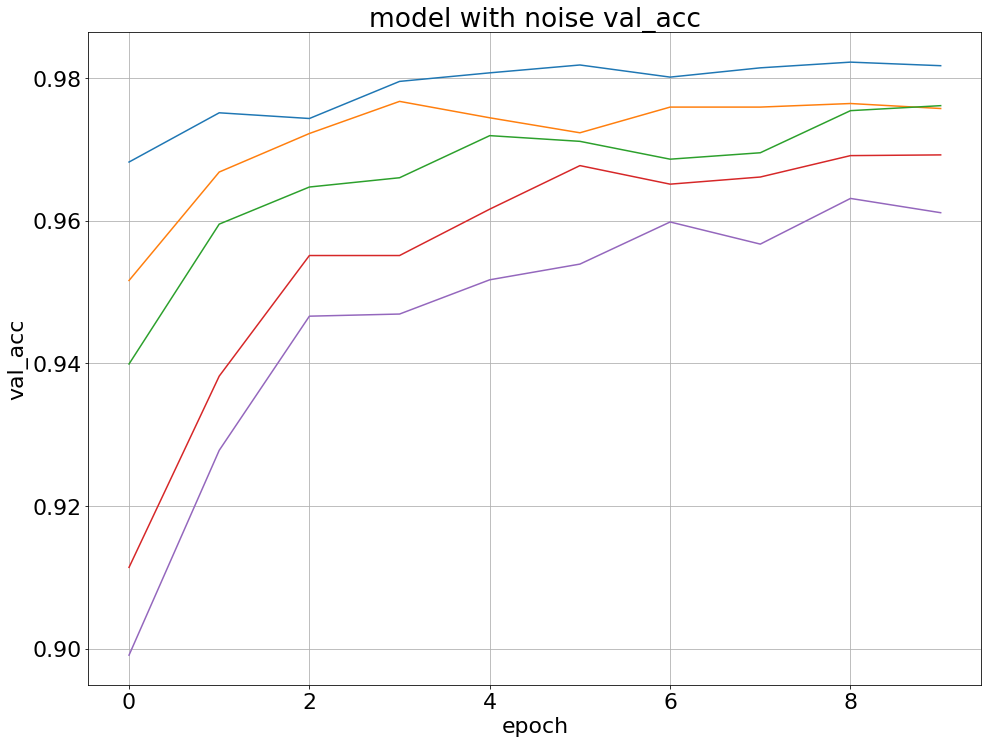

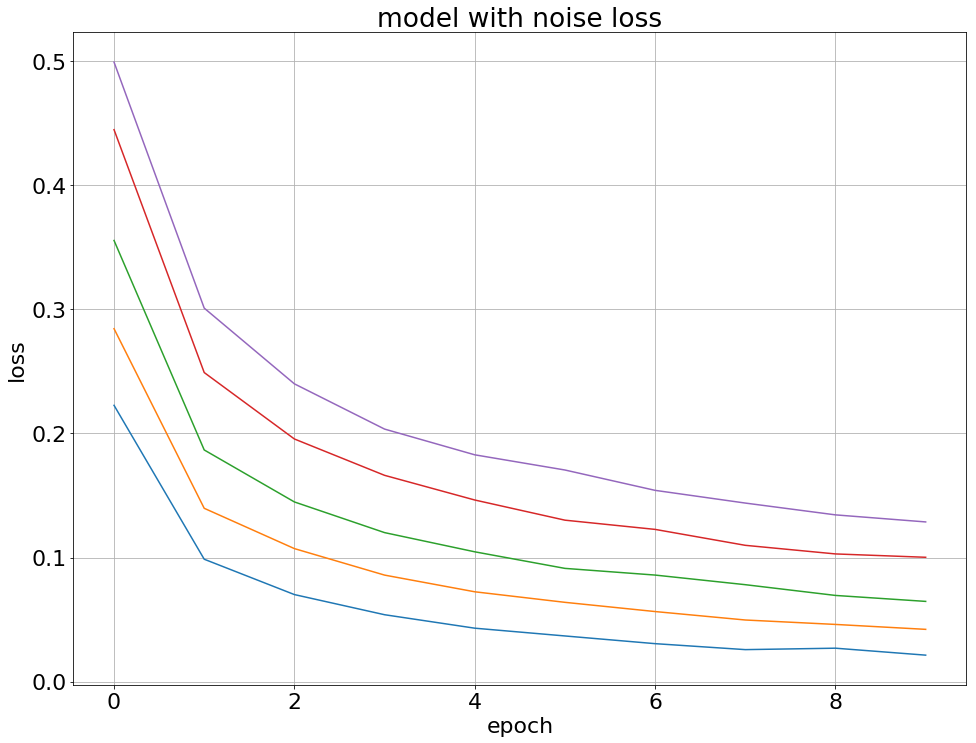

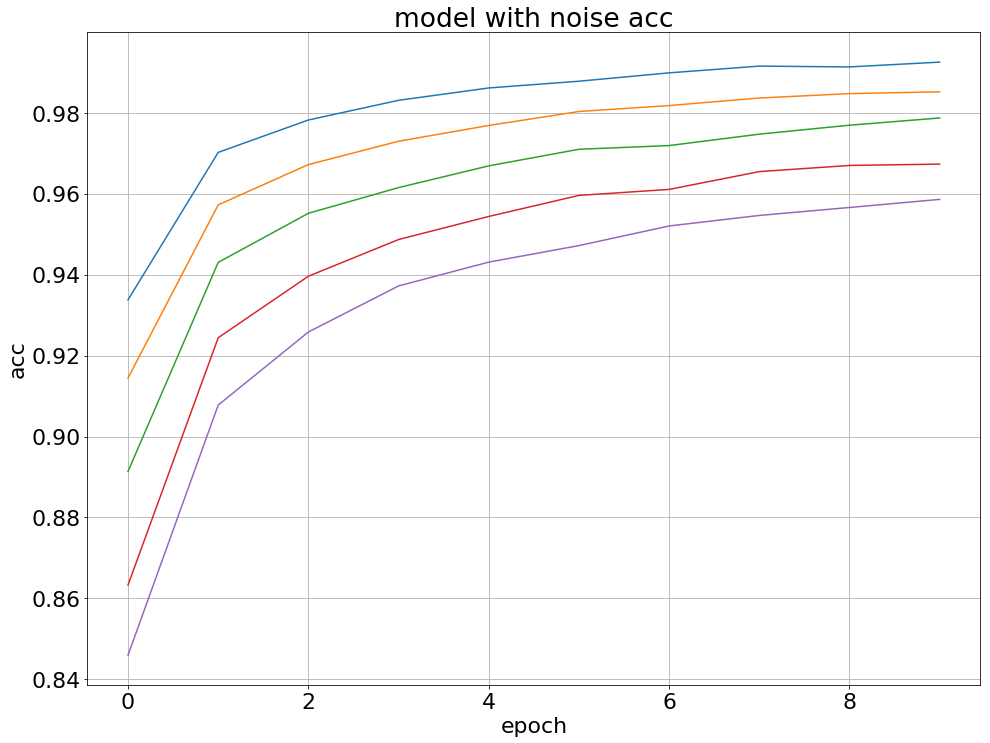

In [44]:
for key in hist_list[0].keys() :
    plt.figure(figsize=(16,12))
    plt.grid(True)

    
    plt.title('model with noise ' + key)
    plt.ylabel(key)
    plt.xlabel('epoch')

    for hist in hist_list :
        plt.plot(hist[key])

    file_neme = 'plots/' + key + ' noise.png'
    plt.savefig(fname=file_neme,format='png')
    plt.show()